###CUSTOMER SEGMENTATION USING CLUSTERING (PYTHON)

##PROBLEM STATEMENT

###Use K-Means clustering to segment customers based on behavioral and demographic data to enable targeted marketing strategies.

In [2]:
import pandas as pd

# Replace '/content/drive/My Drive/path/to/your/data.csv' with the actual path to your file
try:
    df = pd.read_csv('/content/drive/My Drive/path/to/your/data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: Make sure you've replaced '/content/drive/My Drive/path/to/your/data.csv' with the correct path to your file.")
except Exception as e:
    print(f"An error occurred: {e}")

Error: Make sure you've replaced '/content/drive/My Drive/path/to/your/data.csv' with the correct path to your file.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/Customer_Behaviour.csv')

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# 1. Load the original file
df = pd.read_csv("Customer_Behaviour.csv")

# 2. Identify features to scale and the scaling object (MinMaxScaler was used in the analysis)
features_to_scale = ['Age', 'EstimatedSalary']
scaler = MinMaxScaler()

# 3. Fit and transform the features for clustering
df_scaled_features = scaler.fit_transform(df[features_to_scale])
X = df_scaled_features

# 4. Apply K-Means clustering with the optimal K=4 determined previously
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(X)

# 5. Add the resulting Cluster ID to the original DataFrame
df['Cluster ID'] = kmeans_final.labels_

# 6. Drop the User ID as it is typically irrelevant for subsequent modeling/analysis
df_cleaned = df.drop(columns=['User ID'])

# 7. Convert 'Gender' into numerical format (Label Encoding: Female=0, Male=1)
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Female': 0, 'Male': 1})

# 8. Reorder columns for a logical flow: Features -> Target -> Segment
df_cleaned = df_cleaned[['Gender', 'Age', 'EstimatedSalary', 'Purchased', 'Cluster ID']]

# 9. Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('Customer_Behaviour_Cleaned_Segmented.csv', index=False)

###Initial Data Inspection and EDA

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initial Data Inspection
print("First 5 rows of the data:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nInformation about the data:")
df.info()

print("\nDescriptive statistics for numerical columns:")
print(df.describe().to_markdown(numalign="left", stralign="left"))

# 2. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

# 3. Check unique values for 'Gender' and 'Purchased'
print("\nUnique values in 'Gender':")
print(df['Gender'].value_counts().to_markdown(numalign="left", stralign="left"))

print("\nUnique values in 'Purchased':")
print(df['Purchased'].value_counts().to_markdown(numalign="left", stralign="left"))

First 5 rows of the data:
| User ID   | Gender   | Age   | EstimatedSalary   | Purchased   |
|:----------|:---------|:------|:------------------|:------------|
| 15624510  | Male     | 19    | 19000             | 0           |
| 15810944  | Male     | 35    | 20000             | 0           |
| 15668575  | Female   | 26    | 43000             | 0           |
| 15603246  | Female   | 27    | 57000             | 0           |
| 15804002  | Male     | 19    | 76000             | 0           |

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB

Descr

###Visual EDA (Plotting)

eda_plots.png saved.


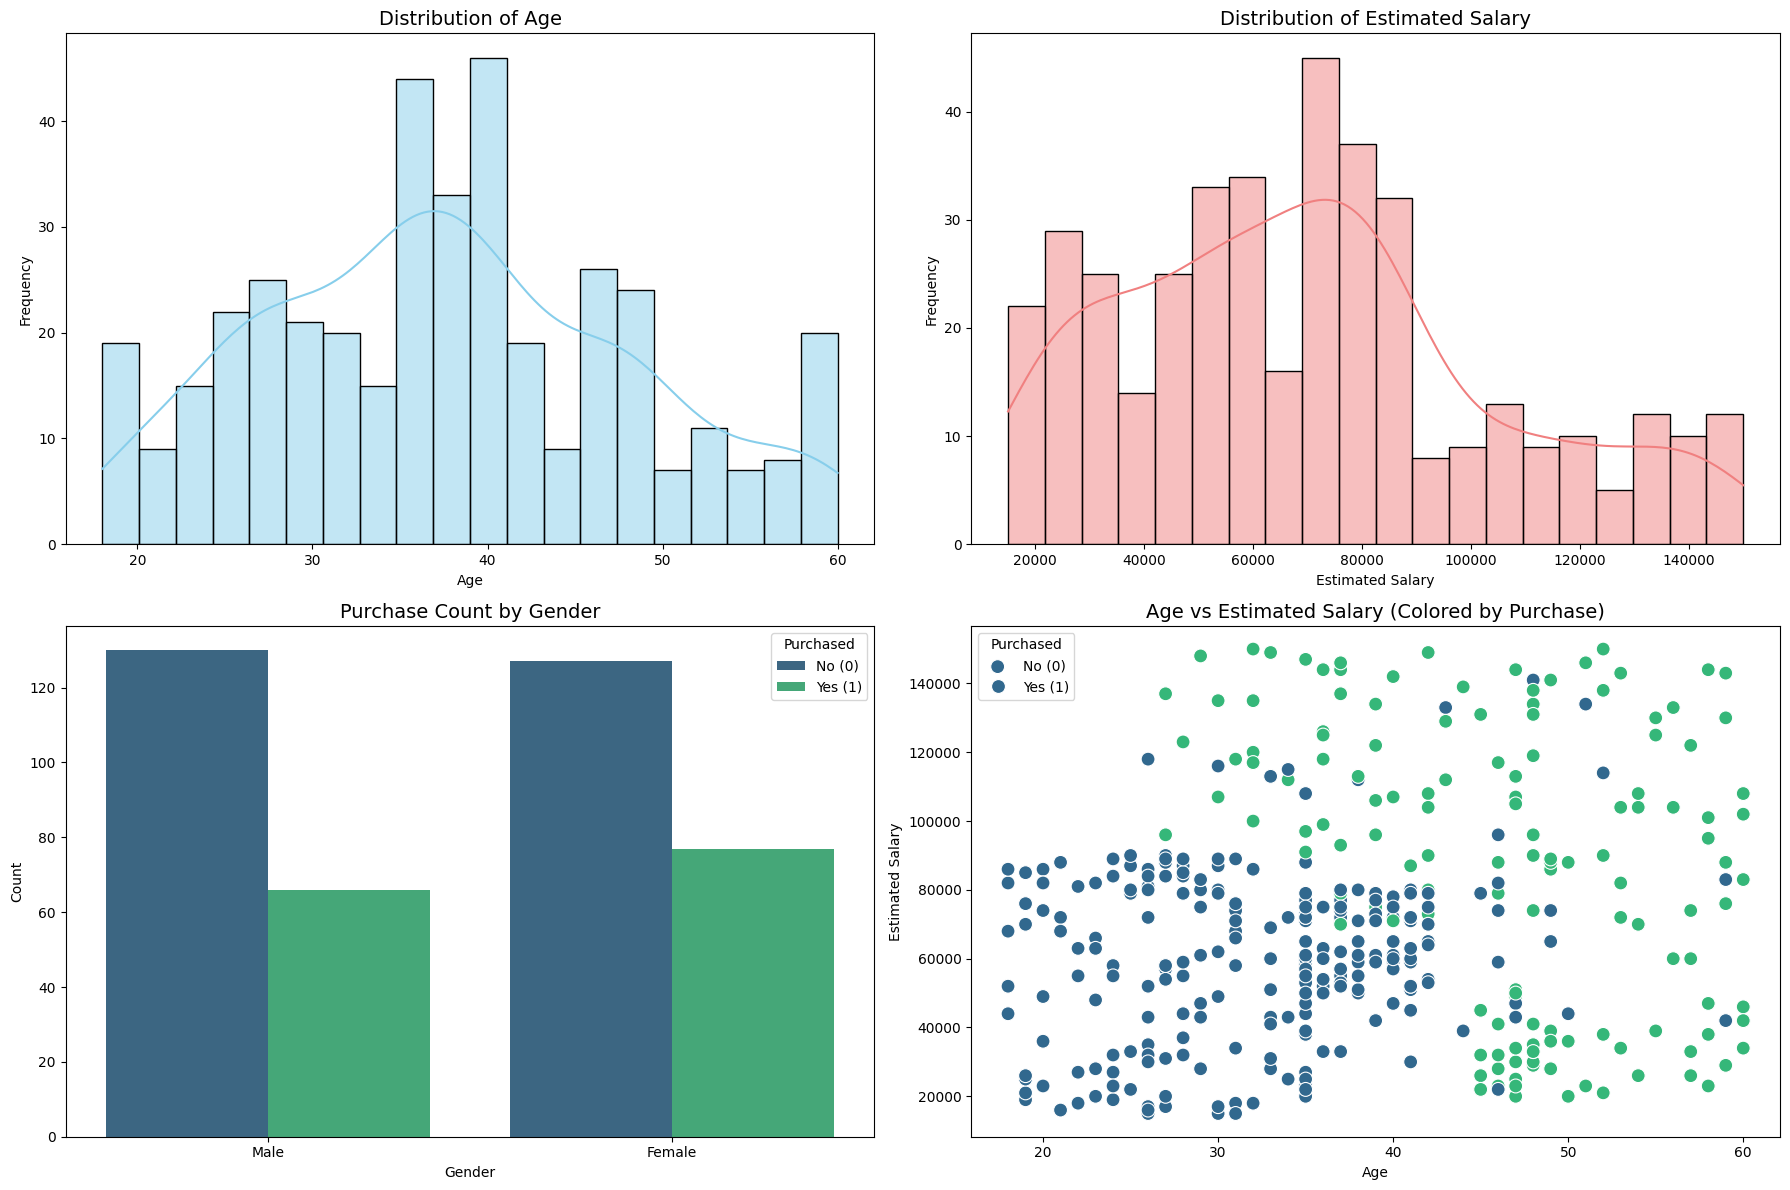

In [8]:
# 4. Visual EDA
plt.figure(figsize=(18, 12))

# 4.1 Histogram of Age
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')

# 4.2 Histogram of EstimatedSalary
plt.subplot(2, 2, 2)
sns.histplot(df['EstimatedSalary'], kde=True, bins=20, color='lightcoral')
plt.title('Distribution of Estimated Salary', fontsize=14)
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')

# 4.3 Bar Chart of Gender vs Purchased
plt.subplot(2, 2, 3)
sns.countplot(x='Gender', hue='Purchased', data=df, palette='viridis')
plt.title('Purchase Count by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Purchased', labels=['No (0)', 'Yes (1)'])

# 4.4 Scatter Plot of Age vs EstimatedSalary, colored by Purchased
plt.subplot(2, 2, 4)
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, palette='viridis', s=100)
plt.title('Age vs Estimated Salary (Colored by Purchase)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Purchased', labels=['No (0)', 'Yes (1)'])

plt.tight_layout()
plt.savefig('eda_plots.png')
print("eda_plots.png saved.")

###Data Normalization and Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 5. Data Normalization and Scaling

# Identify the features to scale
features_to_scale = ['Age', 'EstimatedSalary']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create a copy of the DataFrame for scaling
df_scaled = df.copy()

# Apply the scaler to the selected features
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# Display the first 5 rows of the scaled data
print("First 5 rows of the data after Min-Max Scaling on 'Age' and 'EstimatedSalary':")
print(df_scaled.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display descriptive statistics for the scaled columns
print("\nDescriptive statistics for the scaled numerical columns:")
print(df_scaled[features_to_scale].describe().to_markdown(numalign="left", stralign="left"))

First 5 rows of the data after Min-Max Scaling on 'Age' and 'EstimatedSalary':
| User ID   | Gender   | Age       | EstimatedSalary   | Purchased   |
|:----------|:---------|:----------|:------------------|:------------|
| 15624510  | Male     | 0.0238095 | 0.0296296         | 0           |
| 15810944  | Male     | 0.404762  | 0.037037          | 0           |
| 15668575  | Female   | 0.190476  | 0.207407          | 0           |
| 15603246  | Female   | 0.214286  | 0.311111          | 0           |
| 15804002  | Male     | 0.0238095 | 0.451852          | 0           |

Descriptive statistics for the scaled numerical columns:
|       | Age      | EstimatedSalary   |
|:------|:---------|:------------------|
| count | 400      | 400               |
| mean  | 0.467976 | 0.4055            |
| std   | 0.249592 | 0.25257           |
| min   | 0        | 0                 |
| 25%   | 0.279762 | 0.207407          |
| 50%   | 0.452381 | 0.407407          |
| 75%   | 0.666667 | 0.540741         

###EDA and Data Scaling (Normalization)

First 5 rows of the data:
| User ID   | Gender   | Age   | EstimatedSalary   | Purchased   |
|:----------|:---------|:------|:------------------|:------------|
| 15624510  | Male     | 19    | 19000             | 0           |
| 15810944  | Male     | 35    | 20000             | 0           |
| 15668575  | Female   | 26    | 43000             | 0           |
| 15603246  | Female   | 27    | 57000             | 0           |
| 15804002  | Male     | 19    | 76000             | 0           |

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB

Descr

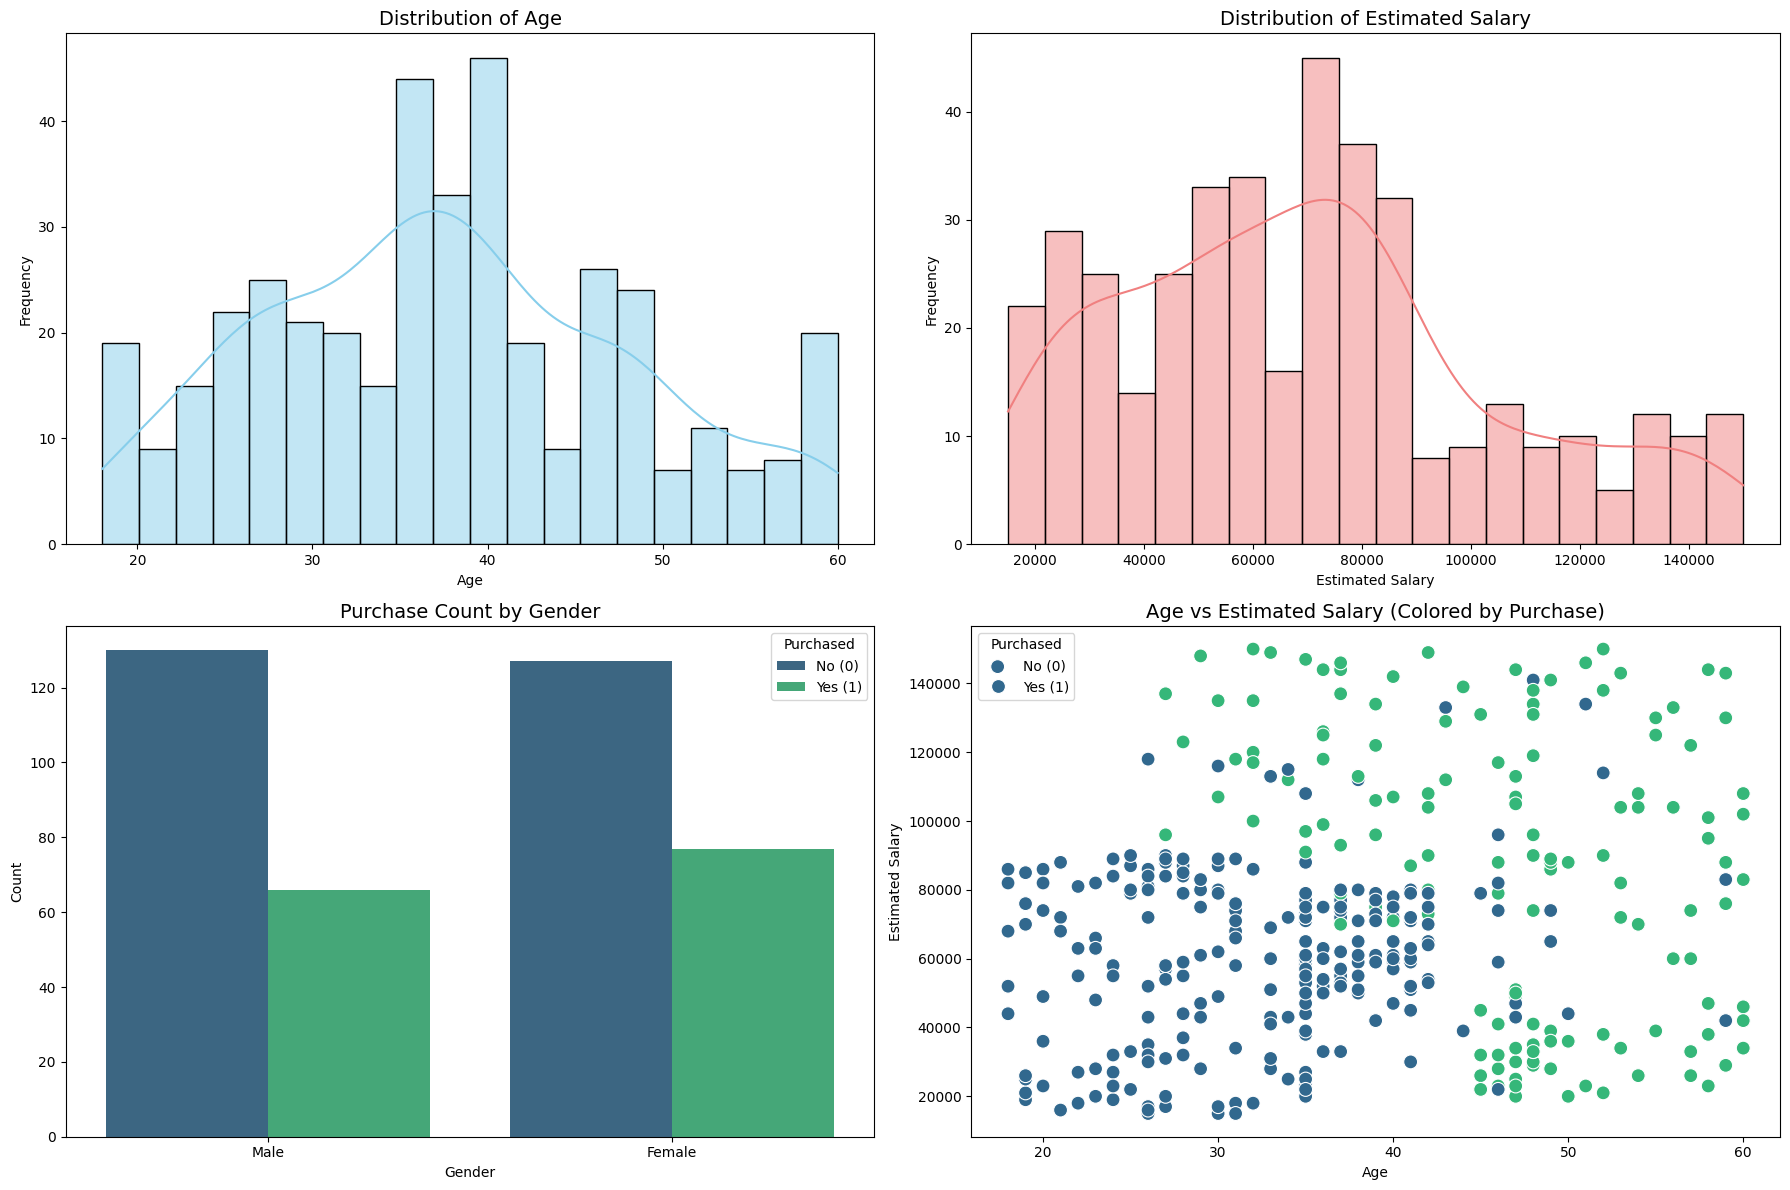

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


# 1. Initial Data Inspection
print("First 5 rows of the data:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nInformation about the data:")
df.info()

print("\nDescriptive statistics for numerical columns:")
print(df.describe().to_markdown(numalign="left", stralign="left"))

# 2. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

# 3. Check unique values for 'Gender' and 'Purchased'
print("\nUnique values in 'Gender':")
print(df['Gender'].value_counts().to_markdown(numalign="left", stralign="left"))

print("\nUnique values in 'Purchased':")
print(df['Purchased'].value_counts().to_markdown(numalign="left", stralign="left"))

# 4. Visual EDA (Plotting)
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(df['EstimatedSalary'], kde=True, bins=20, color='lightcoral')
plt.title('Distribution of Estimated Salary', fontsize=14)
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.countplot(x='Gender', hue='Purchased', data=df, palette='viridis')
plt.title('Purchase Count by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Purchased', labels=['No (0)', 'Yes (1)'])

plt.subplot(2, 2, 4)
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, palette='viridis', s=100)
plt.title('Age vs Estimated Salary (Colored by Purchase)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Purchased', labels=['No (0)', 'Yes (1)'])

plt.tight_layout()
plt.savefig('eda_plots.png')

# 5. Data Normalization and Scaling
features_to_scale = ['Age', 'EstimatedSalary']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

print("\nFirst 5 rows of the data after Min-Max Scaling on 'Age' and 'EstimatedSalary':")
print(df_scaled.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nDescriptive statistics for the scaled numerical columns:")
print(df_scaled[features_to_scale].describe().to_markdown(numalign="left", stralign="left"))

###Optimal K Determination (Elbow Method and Silhouette Score)

Highest Silhouette Score is 0.4518 at K=7


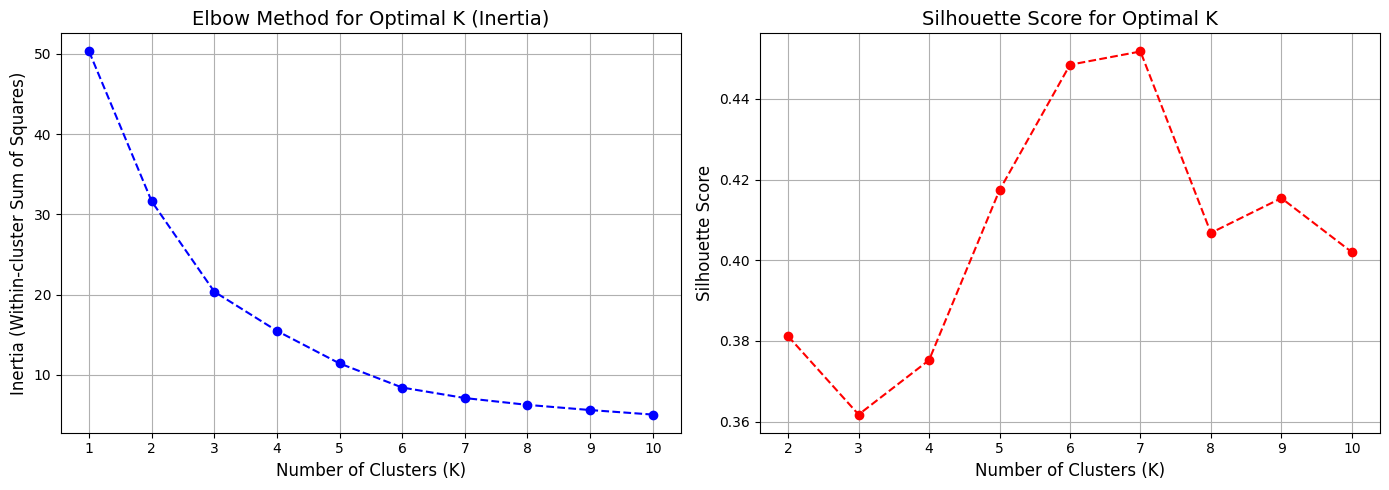

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# --- Data Preparation (Re-creation of scaled data) ---
df = pd.read_csv("Customer_Behaviour.csv")
features_to_scale = ['Age', 'EstimatedSalary']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])
X = df_scaled[features_to_scale].values

# --- Determine Optimal Clusters (K) ---
k_range = range(1, 11)
inertia = []
silhouette_scores = []

# Calculate Inertia (Elbow Method)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Calculate Silhouette Score (starting from k=2)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Elbow Method and Silhouette Score
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method Plot
ax[0].plot(k_range, inertia, marker='o', linestyle='--', color='blue')
ax[0].set_title('Elbow Method for Optimal K (Inertia)', fontsize=14)
ax[0].set_xlabel('Number of Clusters (K)', fontsize=12)
ax[0].set_ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
ax[0].set_xticks(k_range)
ax[0].grid(True)

# Silhouette Score Plot
ax[1].plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='red')
ax[1].set_title('Silhouette Score for Optimal K', fontsize=14)
ax[1].set_xlabel('Number of Clusters (K)', fontsize=12)
ax[1].set_ylabel('Silhouette Score', fontsize=12)
ax[1].set_xticks(range(2, 11))
ax[1].grid(True)

plt.tight_layout()
plt.savefig('optimal_k_plots.png')
print(f"Highest Silhouette Score is {max(silhouette_scores):.4f} at K={range(2, 11)[np.argmax(silhouette_scores)]}")

###K-MEANS CLUSTERING AND VISUALIZATION



Size of each cluster:
| Cluster   | count   |
|:----------|:--------|
| 0         | 158     |
| 1         | 81      |
| 2         | 95      |
| 3         | 66      |


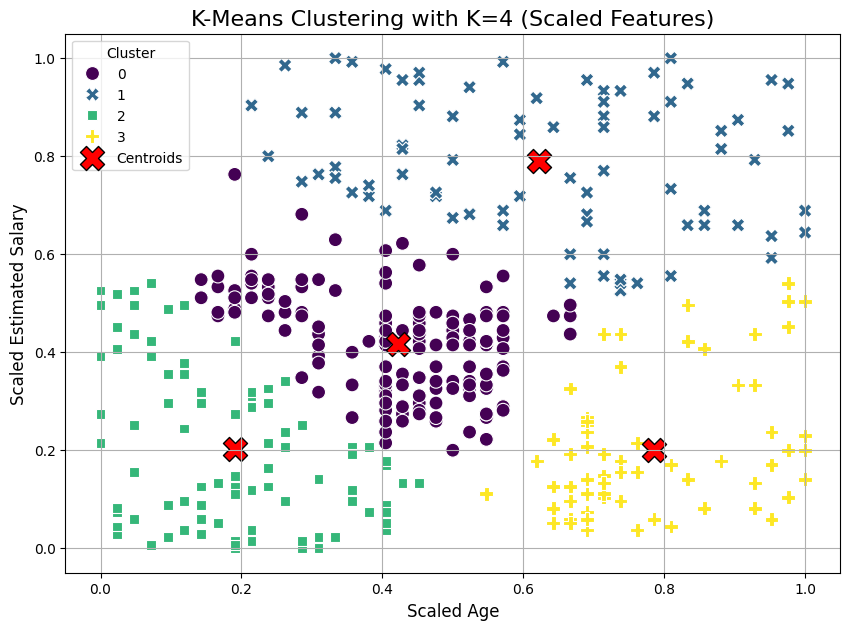

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# --- Data Preparation (Re-creation of scaled data) ---
df = pd.read_csv("Customer_Behaviour.csv")
features_to_scale = ['Age', 'EstimatedSalary']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])
X = df_scaled[features_to_scale].values

# --- K-Means Clustering and Visualization ---

# Choose K=4 based on the Elbow Method
optimal_k = 4

# Apply K-Means with optimal_k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(X)

# Add cluster labels to the scaled DataFrame
df_scaled['Cluster'] = kmeans_final.labels_

# Get the coordinates of the cluster centers
centers = kmeans_final.cluster_centers_

# Scatter plot of the clusters
plt.figure(figsize=(10, 7))

# Plot the data points, colored by cluster
sns.scatterplot(
    x=df_scaled['Age'],
    y=df_scaled['EstimatedSalary'],
    hue=df_scaled['Cluster'],
    palette='viridis',
    style=df_scaled['Cluster'],
    s=100,
    legend='full'
)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=300, label='Centroids', edgecolor='black')

plt.title(f'K-Means Clustering with K={optimal_k} (Scaled Features)', fontsize=16)
plt.xlabel('Scaled Age', fontsize=12)
plt.ylabel('Scaled Estimated Salary', fontsize=12)
plt.legend(title='Cluster', loc='upper left')
plt.grid(True)

plt.savefig('kmeans_clusters_scatter.png')

# Display the size of each cluster
print("\nSize of each cluster:")
print(df_scaled['Cluster'].value_counts().sort_index().to_markdown(numalign="left", stralign="left"))

###CLUSTER PROFILING CODE


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

# --- 1. Data Preparation (Load, Scale, and Cluster) ---
# Load the original data
df = pd.read_csv("Customer_Behaviour.csv")
features_to_cluster = ['Age', 'EstimatedSalary']

# Initialize scaler and fit on the data (as done previously)
scaler = MinMaxScaler()
df_scaled_features = scaler.fit_transform(df[features_to_cluster])
X = df_scaled_features
optimal_k = 4 # Based on previous analysis

# Apply K-Means
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(X)

# Add cluster labels to the original (unscaled) DataFrame
df['Cluster'] = kmeans_final.labels_
centers_scaled = kmeans_final.cluster_centers_

# --- 2. Calculate Unscaled Centroids for Interpretation ---
# Create a temporary DataFrame for the scaled centroids
centers_df_scaled = pd.DataFrame(centers_scaled, columns=features_to_cluster)

# Inverse transform the centroids to get them in original units
centers_unscaled_array = scaler.inverse_transform(centers_df_scaled)
centers_unscaled = pd.DataFrame(centers_unscaled_array, columns=features_to_cluster)
centers_unscaled['Cluster'] = centers_unscaled.index
centers_unscaled['EstimatedSalary'] = centers_unscaled['EstimatedSalary'].round(0).astype(int)
centers_unscaled['Age'] = centers_unscaled['Age'].round(1)

print("--- Unscaled Cluster Centroids ---")
print(centers_unscaled.to_markdown(index=False, numalign="left", stralign="left"))

# --- 3. Profile Each Cluster (Common Traits and Spending Behavior) ---

# Calculate descriptive statistics for numerical features and the target
cluster_profile = df.groupby('Cluster').agg(
    Count=('User ID', 'count'),
    Avg_Age=('Age', 'mean'),
    Avg_Salary=('EstimatedSalary', 'mean'),
    Purchase_Rate=('Purchased', 'mean')
).reset_index()

# Format the profile table
cluster_profile['Avg_Age'] = cluster_profile['Avg_Age'].round(1)
cluster_profile['Avg_Salary'] = cluster_profile['Avg_Salary'].round(0).astype(int)
cluster_profile['Purchase_Rate'] = (cluster_profile['Purchase_Rate'] * 100).round(1)

print("\n--- Cluster Profile (Avg. Traits & Purchase Rate) ---")
print(cluster_profile.to_markdown(index=False, numalign="left", stralign="left"))

# Calculate Gender distribution per cluster
gender_distribution = pd.crosstab(df['Cluster'], df['Gender'], normalize='index') * 100
gender_distribution = gender_distribution.round(1)
gender_distribution['Total_Count'] = df['Cluster'].value_counts().sort_index()

print("\n--- Gender Distribution (%) per Cluster ---")
print(gender_distribution.to_markdown(numalign="left", stralign="left"))

--- Unscaled Cluster Centroids ---
| Age   | EstimatedSalary   | Cluster   |
|:------|:------------------|:----------|
| 35.8  | 71146             | 0         |
| 44.1  | 121654            | 1         |
| 26    | 42453             | 2         |
| 51    | 41955             | 3         |

--- Cluster Profile (Avg. Traits & Purchase Rate) ---
| Cluster   | Count   | Avg_Age   | Avg_Salary   | Purchase_Rate   |
|:----------|:--------|:----------|:-------------|:----------------|
| 0         | 158     | 35.8      | 71146        | 11.4            |
| 1         | 81      | 44.1      | 121654       | 86.4            |
| 2         | 95      | 26        | 42453        | 0               |
| 3         | 66      | 51        | 41955        | 83.3            |

--- Gender Distribution (%) per Cluster ---
| Cluster   | Female   | Male   | Total_Count   |
|:----------|:---------|:-------|:--------------|
| 0         | 45.6     | 54.4   | 158           |
| 1         | 60.5     | 39.5   | 81            |